## Problemas de regresion

Ernesto Reynoso Lizárraga A01639915

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso, LassoCV
from sklearn.feature_selection import SelectKBest, r_regression, SequentialFeatureSelector, RFE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

##Problema 1

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Inteligencia Artificial/crime_data.csv")
df.head()

,State,VR,MR,M,W,H,P,S
0,AK,761,9.0,41.8,75.2,86.6,9.1,14.3
1,AL,780,11.6,67.4,73.5,66.9,17.4,11.5
2,AR,593,10.2,44.7,82.9,66.3,20.0,10.7
3,AZ,715,8.6,84.7,88.6,78.7,15.4,12.1
4,CA,1078,13.1,96.7,79.3,76.2,18.2,12.5


###Grafica cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula.

In [ ]:
df = df.drop(['State','VR','P'],axis=1)
df.head()

,MR,M,W,H,S
0,9.0,41.8,75.2,86.6,14.3
1,11.6,67.4,73.5,66.9,11.5
2,10.2,44.7,82.9,66.3,10.7
3,8.6,84.7,88.6,78.7,12.1
4,13.1,96.7,79.3,76.2,12.5


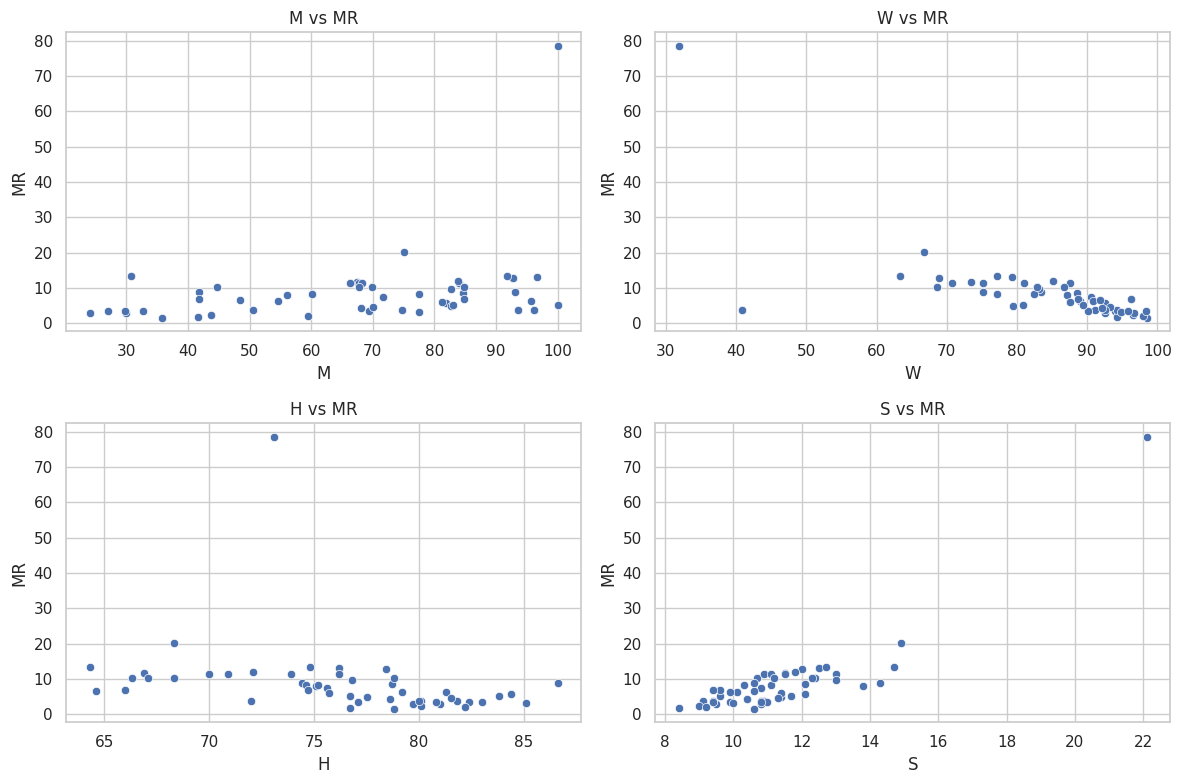

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

sns.scatterplot(data=df, x='M', y='MR', ax=axes[0, 0])
axes[0, 0].set_title('M vs MR')

sns.scatterplot(data=df, x='W', y='MR', ax=axes[0, 1])
axes[0, 1].set_title('W vs MR')

sns.scatterplot(data=df, x='H', y='MR', ax=axes[1, 0])
axes[1, 0].set_title('H vs MR')

sns.scatterplot(data=df, x='S', y='MR', ax=axes[1, 1])
axes[1, 1].set_title('S vs MR')

plt.tight_layout()
plt.show()

###Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal, y obtenga con ella el modelo que corresponde a la variable de respuesta y las variables predictoras asignadas a tu número de matrícula.

In [ ]:
#Variables regresoras
x = np.array(df[['M','W','H','S']])
y = np.array(df['MR'])

In [ ]:
#x.insert(0, 'ONES', 1,False)
x = np.column_stack((np.ones(x.shape[0]), x))

###Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal, y obtenga con ella el modelo que corresponde a la variable de respuesta y las variables predictoras asignadas a tu número de matrícula.

In [ ]:
# Fit model function (it fits a linear model using the specified data set).
def fit_model(x, y):
  return np.linalg.inv(x.T @ x) @ x.T @ y
# Predict function (it evaluates an array of observations using the specified linear model).
def predict(X, beta):
  return X @ beta

In [ ]:
beta = fit_model(x,y)

print("Coeficientes: ", beta)

y_pred = predict(x, beta)
r = y - y_pred

Coeficientes:  [-9.47235284  0.03215936 -0.16912874 -0.12137218  3.48850667]


###Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R2, MSE y MAE.

In [ ]:
# Evaluate model with cross validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True)
mse_cv = []
mae_cv = []
r2_cv = []
for train_index, test_index in kf.split(x):
  # Training phase
  x_train = x[train_index, :]
  y_train = y[train_index]
  beta_cv = fit_model(x_train, y_train)

  # Test phase
  x_test = x[test_index, :]
  y_test = y[test_index]
  y_pred = predict(x_test, beta_cv)

  # Calculate MSE, MAE and R^2
  mse_i = mean_squared_error(y_test, y_pred)
  mse_cv.append(mse_i)
  mae_i = mean_absolute_error(y_test, y_pred)
  mae_cv.append(mae_i)
  r2_i = r2_score(y_test, y_pred)
  r2_cv.append(r2_i)

print('MSE:', np.average(mse_cv), ' MAE:', np.average(mae_cv),' R^2:', np.average(r2_cv))

MSE: 73.41055004857718  MAE: 4.000566711326771  R^2: -1.8241864005262183


###Utiliza el método de validación cruzada asignado a tu matrícula para mostrar los histogramas de R2 (sólo si es el método de Monte Carlo), MSE y MAE.

Metodo LOOCV

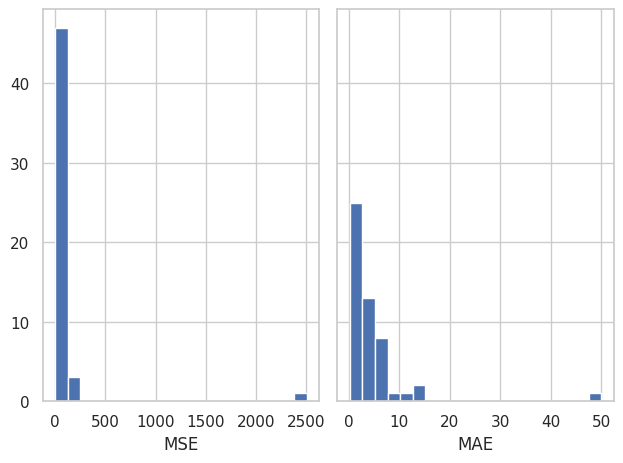

In [ ]:
kf = LeaveOneOut()
mse_cv = []
mae_cv = []
for train_index, test_index in kf.split(x):
  # Training phase
  x_train = x[train_index, :]
  y_train = y[train_index]

  regr_cv = linear_model.LinearRegression()
  regr_cv.fit(x_train, y_train)

  # Test phase
  x_test = x[test_index, :]
  y_test = y[test_index]

  y_pred = regr_cv.predict(x_test)

  # Calculate MSE and MAE
  mse_i = mean_squared_error(y_test, y_pred)
  mse_cv.append(mse_i)

  mae_i = mean_absolute_error(y_test, y_pred)
  mae_cv.append(mae_i)

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(mse_cv, bins=20)
axs[0].set_xlabel("MSE")

axs[1].hist(mae_cv, bins=20)
axs[1].set_xlabel("MAE")

plt.show()

###Agrega al conjunto de datos columnas que representen los cuadrados de las variables predictoras (por ejemplo, M2, W2), así como los productos entre pares de variables (por ejemplo, PxS, MxW). Repita los pasos 1, 2 y 3 pero con este nuevo conjunto de datos.

In [ ]:
df2 = pd.DataFrame()
df2['MR'] = df['MR']
df2['M2'] = df['M']**2
df2['W2'] = df['W']**2
df2['H2'] = df['H']**2
df2['S2'] = df['S']**2

df2['MW'] = df['M'] * df['W']
df2['MH'] = df['M'] * df['H']
df2['MS'] = df['M'] * df['S']
df2['WH'] = df['W'] * df['H']
df2['WS'] = df['W'] * df['S']
df2['HS'] = df['H'] * df['S']
df2.head()

,MR,M2,W2,H2,S2,MW,MH,MS,WH,WS,HS
0,9.0,1747.24,5655.04,7499.56,204.49,3143.36,3619.88,597.74,6512.32,1075.36,1238.38
1,11.6,4542.76,5402.25,4475.61,132.25,4953.90,4509.06,775.10,4917.15,845.25,769.35
2,10.2,1998.09,6872.41,4395.69,114.49,3705.63,2963.61,478.29,5496.27,887.03,709.41
3,8.6,7174.09,7849.96,6193.69,146.41,7504.42,6665.89,1024.87,6972.82,1072.06,952.27
4,13.1,9350.89,6288.49,5806.44,156.25,7668.31,7368.54,1208.75,6042.66,991.25,952.50


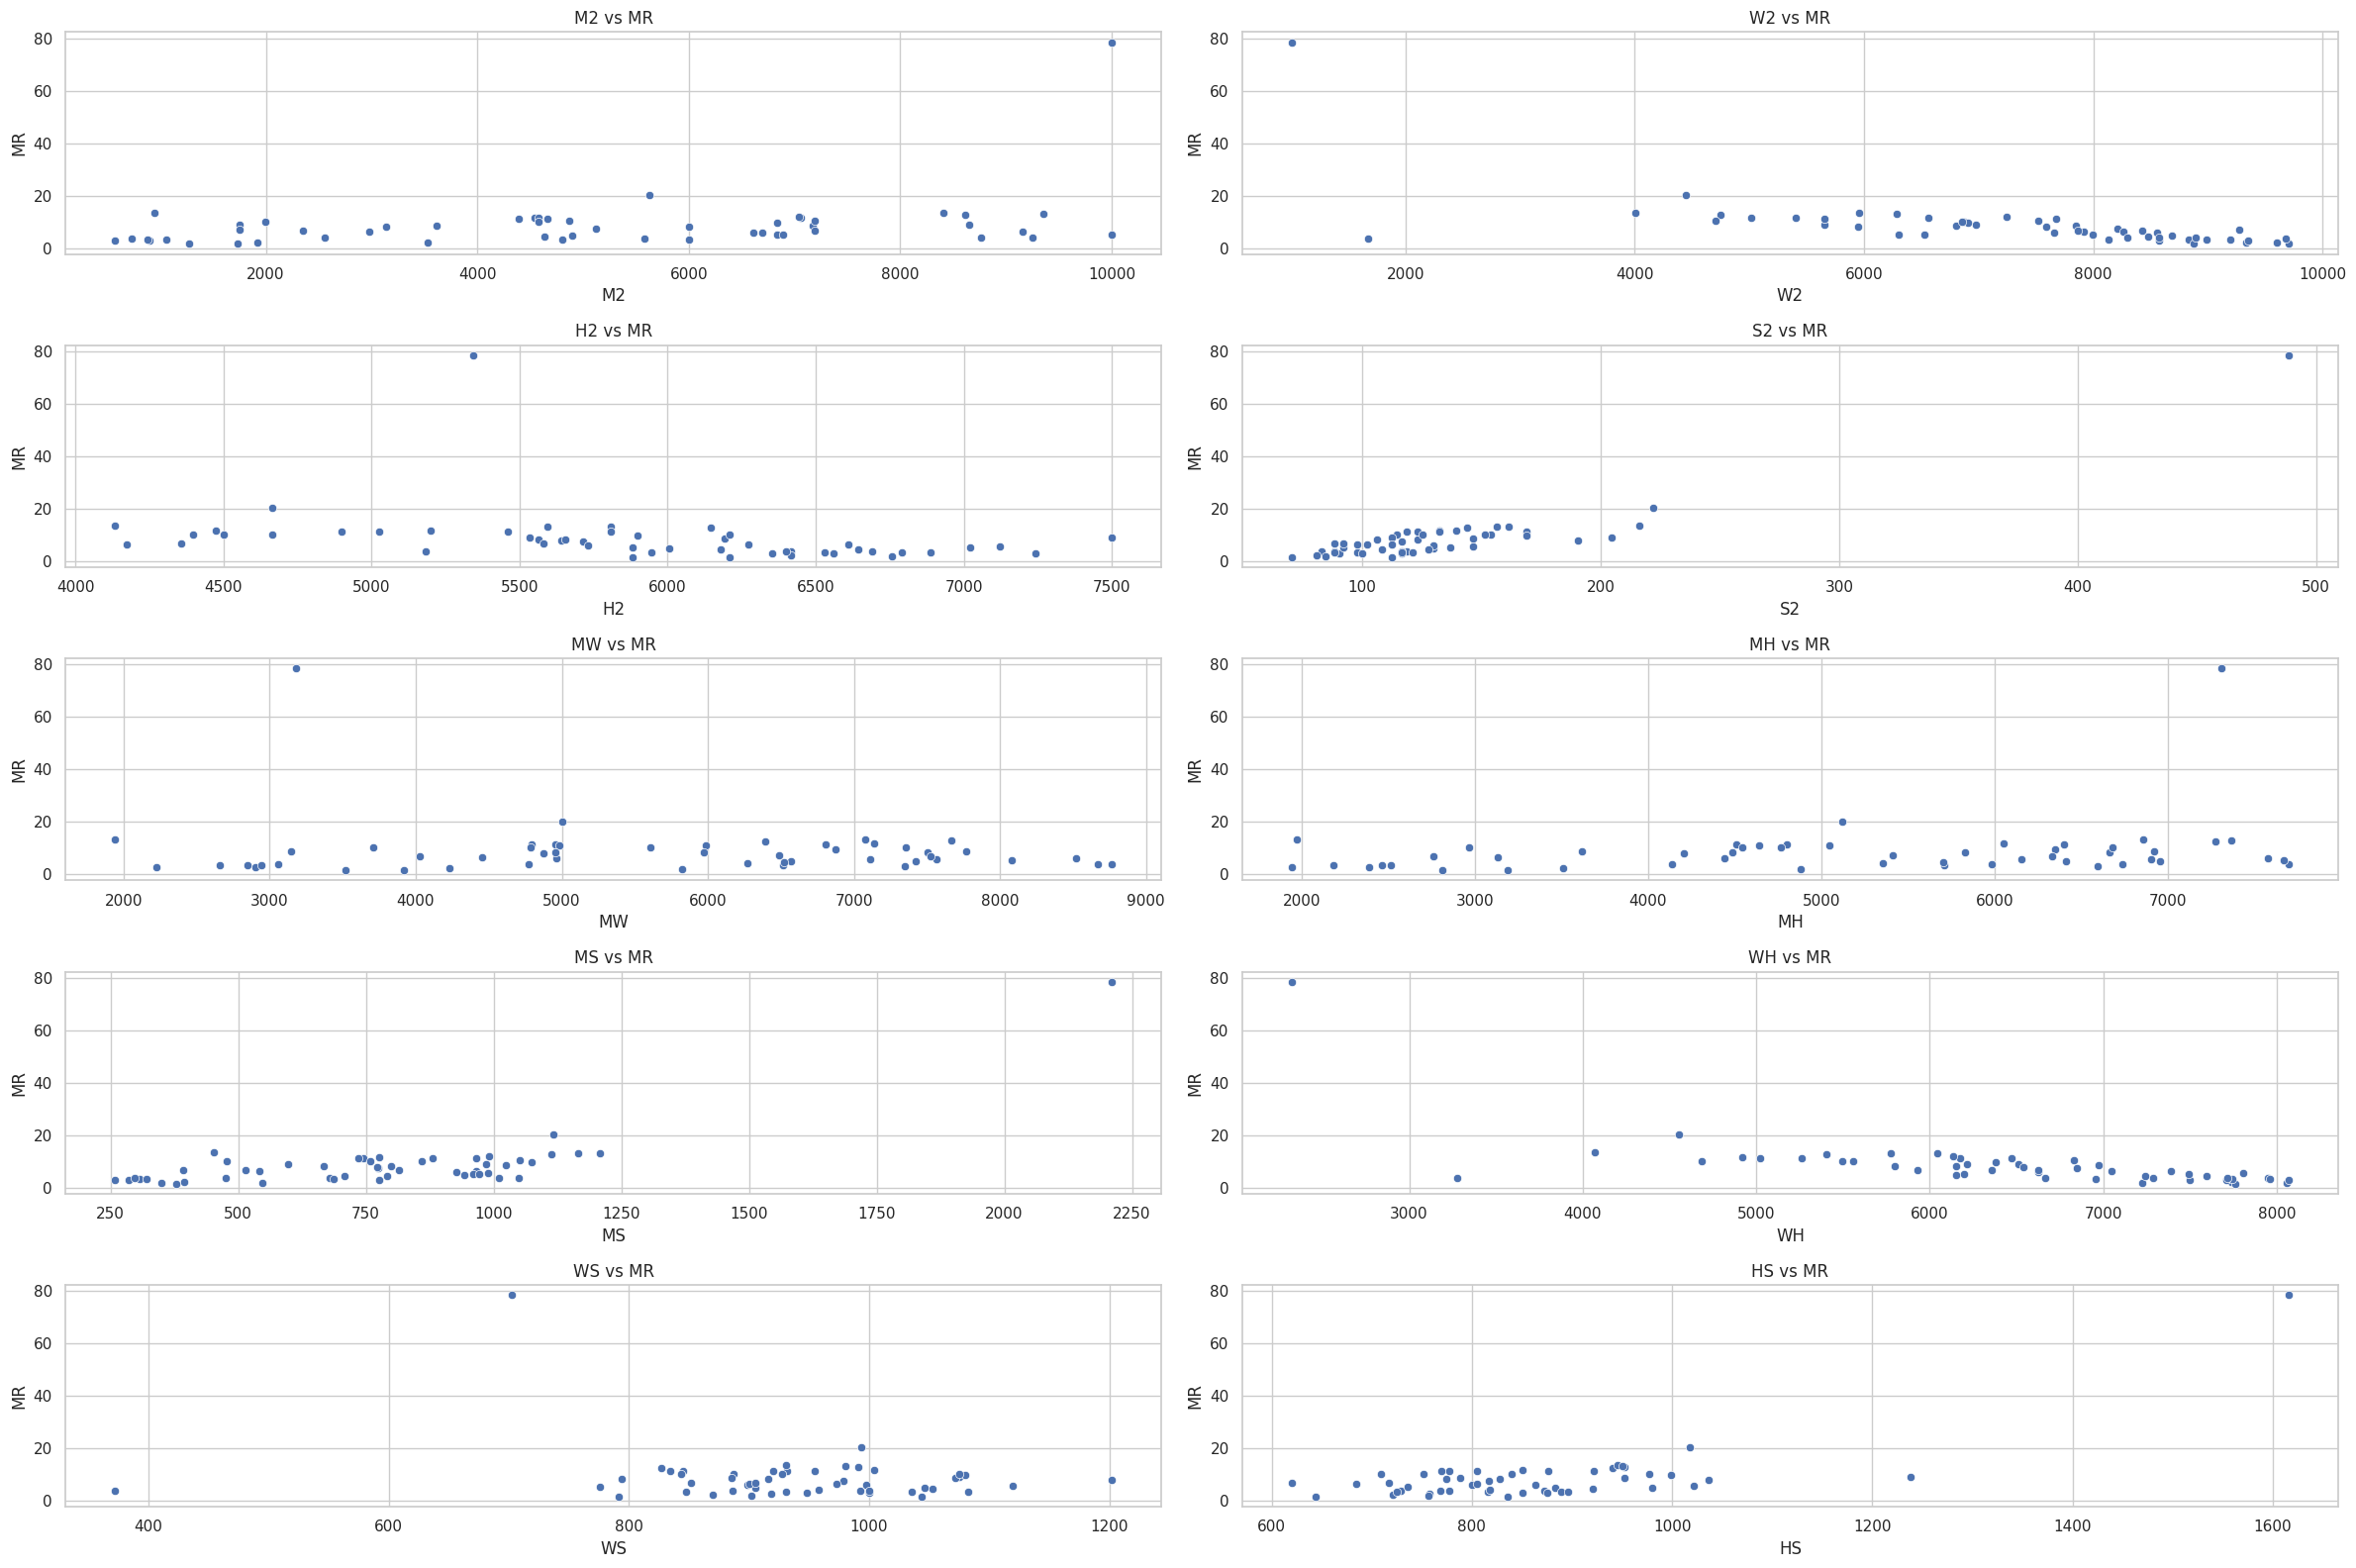

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(24, 16))
plt.subplots_adjust(hspace=0.5)

sns.scatterplot(data=df2, x='M2', y='MR', ax=axes[0, 0])
axes[0, 0].set_title('M2 vs MR')

sns.scatterplot(data=df2, x='W2', y='MR', ax=axes[0, 1])
axes[0, 1].set_title('W2 vs MR')

sns.scatterplot(data=df2, x='H2', y='MR', ax=axes[1, 0])
axes[1, 0].set_title('H2 vs MR')

sns.scatterplot(data=df2, x='S2', y='MR', ax=axes[1, 1])
axes[1, 1].set_title('S2 vs MR')

sns.scatterplot(data=df2, x='MW', y='MR', ax=axes[2, 0])
axes[2, 0].set_title('MW vs MR')

sns.scatterplot(data=df2, x='MH', y='MR', ax=axes[2, 1])
axes[2, 1].set_title('MH vs MR')

sns.scatterplot(data=df2, x='MS', y='MR', ax=axes[3, 0])
axes[3, 0].set_title('MS vs MR')

sns.scatterplot(data=df2, x='WH', y='MR', ax=axes[3, 1])
axes[3, 1].set_title('WH vs MR')

sns.scatterplot(data=df2, x='WS', y='MR', ax=axes[4, 0])
axes[4, 0].set_title('WS vs MR')

sns.scatterplot(data=df2, x='HS', y='MR', ax=axes[4, 1])
axes[4, 1].set_title('HS vs MR')

plt.tight_layout()
plt.show()

In [ ]:
#Variables regresoras
x_2 = np.array(df2[['M2','W2','H2','S2','MW','MH','MS','WH','WS','HS']])
y_2 = np.array(df2['MR'])

#Promedio de las variables
x2_mean = x_2.mean()
y2_mean = y_2.mean()

In [ ]:
x_2 = np.column_stack((np.ones(x_2.shape[0]), x_2))

In [ ]:
beta_2 = fit_model(x_2,y_2)

print("Coeficientes: ", beta_2)

y_pred2 = predict(x_2, beta_2)
r_2 = y_2 - y_pred2

Coeficientes:  [ 1.40020170e+01 -6.28475658e-04  9.06954553e-04 -1.17934518e-02
 -8.45746762e-03 -1.62502141e-03  7.61135116e-04  1.88054219e-02
  7.58645554e-03 -6.77623947e-02  7.71171363e-02]


In [ ]:
# Evaluate linear regression model using k-fold cross-validation
kf_2 = KFold(n_splits=n_folds, shuffle = True)
mse_cv2 = []
mae_cv2 = []
r2_cv2 = []
for train_index, test_index in kf_2.split(x_2):
  # Training phase
  x_train = x_2[train_index, :]
  y_train = y_2[train_index]
  regr_cv = linear_model.LinearRegression()
  regr_cv.fit(x_train, y_train)
  # Test phase
  x_test = x_2[test_index, :]
  y_test = y_2[test_index]
  y_pred = regr_cv.predict(x_test)
  # MSE, MAE y R^2
  mse_i = mean_squared_error(y_test, y_pred)
  mse_cv2.append(mse_i)
  mae_i = mean_absolute_error(y_test, y_pred)
  mae_cv2.append(mae_i)
  r2_i = r2_score(y_test, y_pred)
  r2_cv2.append(r2_i)
print('MSE:', np.average(mse_cv2), ' MAE:', np.average(mae_cv2),' R^2:', np.average(r2_cv2))

MSE: 97.59216950120113  MAE: 3.2454837791932034  R^2: 0.4835958639001797


###Implementa regresión Ridge con descenso de gradiente, y genera el gráfico de Ridge para el conjunto de datos original (sin las variables elevadas al cuadrado).

In [ ]:
# Error function (it evaluates the mean squared error function for the specified model and data set).
def mse(X, y, beta):
  y_pred = X @ beta
  return (y - y_pred).sum()
# Gradient of error function (it evaluates the gradient of the mean squared error function for the specified model and data set).
def grad(X, y, beta, lambd):
  n = len(y)
  y_pred = X @ beta
  res = y - y_pred
  tmp = res*X.transpose()
  return -(2/n)*tmp.sum(axis = 1) + 2*lambd*beta

def fit_modelRidge(x,y,lambd = 0.1, alpha = 0.0005, maxit = 100000):
  npredictors = x.shape[1]

  beta = 2 * np.random.rand(npredictors)-1.0

  it = 0
  while (np.linalg.norm(grad(x,y,beta,lambd)) > 1e-4) and (it < maxit):
    beta = beta - alpha*grad(x,y,beta,lambd)
    it = it + 1
  return beta

In [ ]:
lambdas = np.logspace(-2,3,50)
coefs=[]

scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)
for l in lambdas:
  betaR = fit_modelRidge(x_normalized,y,l)
  coefs.append(betaR)

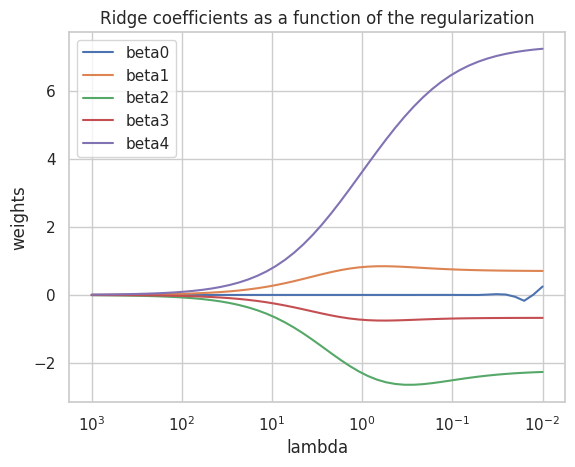

In [ ]:
axis = plt.gca()
lineObjects = axis.plot(lambdas, coefs)
axis.set_xscale('log')
axis.set_xlim(axis.get_xlim()[::-1])
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

features = ['beta' + str(feat) for feat in range(coefs[0].shape[0])]
axis.legend(iter(lineObjects), features)

plt.show()

###Utiliza una librería para generar el gráfico de Lasso para el conjunto de datos original (sin las variables elevadas al cuadrado). ¿Qué variables son más relevantes para el modelo?

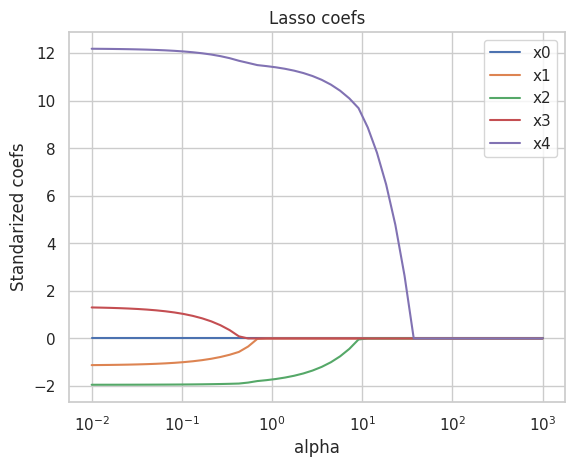

In [ ]:
X_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size=0.8,random_state=42)

alphas = np.logspace(-2, 3, 50)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(X_train, y_train)
  coefs.append(lasso.coef_)

ax = plt.gca()

lineObjects = ax.plot(alphas,coefs)
ax.set_xscale('log')
axis.set_xlim(axis.get_xlim()[::-1])
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standarized coefs')
plt.title('Lasso coefs')
features = ['x' + str(feat) for feat in range(coefs[0].shape[0])]
ax.legend(iter(lineObjects), features)
plt.show()

Viendo la grafica podemos determinar que $x_4$ ('S') es la variable mas relevante

###Viendo los resultados de regresión, desarrolla una conclusión sobre los siguientes puntos:

**¿Consideras que el modelo de regresión lineal es efectivo para modelar los datos del problema? ¿Por qué?**

Considero que la regresion lineal debido a que la MAE no es muy grande.

**¿Observas una variabilidad importante en los valores de R2, MSE y MAE cuando aplicas validación cruzada? Detalla tu respuesta.**

Al aplicar validación cruzada se puede observar que la medida MSE varia bastante con respecto a MAE, esto se puede deber a que en el modelo se predicen algunos datos que se alejan bastante de los datos reales, pero la mayoria de las predicciones puede no haber una gran diferencia, lo que ocasiona que en MAE el error no sea elevado como en MSE.

**¿Qué modelo es mejor para los datos de criminalidad, el lineal o el cuadrático? ¿Por qué?**

El modelo cuadratico debido a que las medidas de error (MSE y MAE) se vieron reducidas.

**¿Qué variables son más relevantes para el modelo según Ride y Lasso?**

La variable mas relevante para el modelo es x4, que en este caso es la variable 'S'

**¿Encuentras alguna relación interesante entre la variable de respuesta y los predictores?**

La relación que me resulto mas interesante entre las variables es que una de las variables tiene mucha mas peso para predecir el modelo ('S')


##Problema 2

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial/Life Expectancy Data.csv')
df2.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
Status = df2['Status']
df2 = df2.drop(['Country','Year','Status','Adult Mortality','Hepatitis B','Polio', 'GDP', 'Income composition of resources'],axis=1)

In [ ]:
df2.head()

,Life expectancy,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,thinness 5-9 years,Schooling
0,65.0,62,0.01,71.279624,1154,19.1,83,8.16,65.0,0.1,33736494.0,17.2,17.3,10.1
1,59.9,64,0.01,73.523582,492,18.6,86,8.18,62.0,0.1,327582.0,17.5,17.5,10.0
2,59.9,66,0.01,73.219243,430,18.1,89,8.13,64.0,0.1,31731688.0,17.7,17.7,9.9
3,59.5,69,0.01,78.184215,2787,17.6,93,8.52,67.0,0.1,3696958.0,17.9,18.0,9.8
4,59.2,71,0.01,7.097109,3013,17.2,97,7.87,68.0,0.1,2978599.0,18.2,18.2,9.5


In [ ]:
df2.isnull().sum()

Life expectancy            10
infant deaths               0
Alcohol                   194
percentage expenditure      0
Measles                     0
 BMI                       34
under-five deaths           0
Total expenditure         226
Diphtheria                 19
 HIV/AIDS                   0
Population                652
 thinness  1-19 years      34
 thinness 5-9 years        34
Schooling                 163
dtype: int64

In [ ]:
df2 = df2.dropna()

In [ ]:
#Variables regresoras
x2 = np.array(df2[df2.columns[1:]])
y2 = np.array(df2['Life expectancy '])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

modelo = linear_model.LinearRegression()
modelo.fit(x_train, y_train)
modelo.score(x_test, y_test)

0.8410412539356263

###Evalúa con validación cruzada un modelo de regresión lineal para las variables asignadas según tu matrícula utilizando alguna librería o framework.

In [ ]:
kfold_valid = KFold(5)
resultados = cross_val_score(modelo, x2, y2, cv = kfold_valid)
print(resultados)
resultados.mean()

[0.83654792 0.78706151 0.78039393 0.75511714 0.7021512 ]


0.7722543388301076

###Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.

In [ ]:
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
selected_features = []

for n_feat in n_feats:
  print('---- n features =', n_feat)
  mse_cv = []
  mae_cv = []
  r2_cv = []

  kf = KFold(n_splits=5, shuffle = True)
  for train_index, test_index in kf.split(x2):
    # Training phase
    x_train = x2[train_index, :]
    y_train = y2[train_index]
    fselection_cv = SelectKBest(r_regression, k = n_feat)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    regr_cv = linear_model.LinearRegression()
    regr_cv.fit(x_train, y_train)
    selected_features.append(fselection_cv.get_feature_names_out())

    # Test phase
    x_test = fselection_cv.transform(x2[test_index, :])
    y_test = y2[test_index]
    y_pred = regr_cv.predict(x_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)

  mse = np.average(mse_cv)
  mse_nfeat.append(mse)
  mae = np.average(mae_cv)
  mae_nfeat.append(mae)
  r2 = np.average(r2_cv)
  r2_nfeat.append(r2)
  print('MSE:', mse, ' MAE:', mae,' R^2:', r2)

#Caracteristicas seleccionadas
optimal_n_feat = n_feats[np.argmin(mse_nfeat)]
optimal_selected_features = selected_features[optimal_n_feat]
print("Numero de caracteristicas: ", optimal_n_feat)
print("Caracteristicas seleccionadas: ", optimal_selected_features)

----- Optimal selection of number of features -----
---- n features = 1
MSE: 38.38501583618673  MAE: 4.692776730998428  R^2: 0.6070575673941725
---- n features = 2
MSE: 36.118160520601116  MAE: 4.601875661911336  R^2: 0.6281800401154182
---- n features = 3
MSE: 34.66320911823859  MAE: 4.493895230044286  R^2: 0.6442146536884739
---- n features = 4
MSE: 34.28426617969115  MAE: 4.4670731324881725  R^2: 0.6470652470738465
---- n features = 5
MSE: 33.09855487022878  MAE: 4.375188832241735  R^2: 0.6592276409457292
---- n features = 6
MSE: 33.21609477242763  MAE: 4.384948769812958  R^2: 0.6587219702790893
---- n features = 7
MSE: 32.92639168025022  MAE: 4.364426580308265  R^2: 0.6618280904001704
---- n features = 8
MSE: 33.073227367176955  MAE: 4.3760776911506944  R^2: 0.6587485879150881
---- n features = 9
MSE: 32.93164712232072  MAE: 4.35941375694865  R^2: 0.6636800219813379
Numero de caracteristicas:  7
Caracteristicas seleccionadas:  ['x4' 'x12']


###Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.

In [ ]:
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
selected_features = []

for n_feat in n_feats:
  print('---- n features =', n_feat)
  mse_cv = []
  mae_cv = []
  r2_cv = []

  kf = KFold(n_splits=5, shuffle = True)
  for train_index, test_index in kf.split(x2):
    # Training phase
    x_train = x2[train_index, :]
    y_train = y2[train_index]
    regr_cv = linear_model.LinearRegression()
    fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select=n_feat)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    regr_cv.fit(x_train, y_train)
    selected_features.append(fselection_cv.get_feature_names_out())

    # Test phase
    x_test = fselection_cv.transform(x2[test_index, :])
    y_test = y2[test_index]
    y_pred = regr_cv.predict(x_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)

  mse = np.average(mse_cv)
  mse_nfeat.append(mse)
  mae = np.average(mae_cv)
  mae_nfeat.append(mae)
  r2 = np.average(r2_cv)
  r2_nfeat.append(r2)

  print('MSE:', mse, ' MAE:', mae,' R^2:', r2)

optimal_n_feat = n_feats[np.argmin(mse_nfeat)]
optimal_selected_features = selected_features[optimal_n_feat]
print("Numero de caracteristicas: ", optimal_n_feat)
print("Caracteristicas seleccionadas: ", optimal_selected_features)

----- Optimal selection of number of features -----
---- n features = 1
MSE: 38.4323491348123  MAE: 4.6956261253618  R^2: 0.6055720052823526
---- n features = 2
MSE: 22.598318942243036  MAE: 3.6785621475700765  R^2: 0.7675482536349022
---- n features = 3
MSE: 21.888629258247455  MAE: 3.632868294359626  R^2: 0.7755011906887905
---- n features = 4
MSE: 20.618172825278805  MAE: 3.525139201151275  R^2: 0.7879793736666441
---- n features = 5
MSE: 19.963991521837094  MAE: 3.469864006310157  R^2: 0.7948662871561182
---- n features = 6
MSE: 20.048449341238577  MAE: 3.478220949910635  R^2: 0.7928897164368386
---- n features = 7
MSE: 19.987301043852106  MAE: 3.4757502715372133  R^2: 0.7940290277345191
---- n features = 8
MSE: 19.89142398552722  MAE: 3.467122449210083  R^2: 0.7957457956519913
---- n features = 9
MSE: 19.756254692901404  MAE: 3.457573648035467  R^2: 0.7964796893386925
Numero de caracteristicas:  9
Caracteristicas seleccionadas:  ['x8' 'x12']


###Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo (Filter-Wrapper). Reporta los predictores óptimos encontrados por el método.

In [ ]:
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
selected_features = []

for n_feat in n_feats:
  print('---- n features =', n_feat)
  mse_cv = []
  mae_cv = []
  r2_cv = []

  kf = KFold(n_splits=5, shuffle = True)
  for train_index, test_index in kf.split(x2):
    # Training phase
    x_train = x2[train_index, :]
    y_train = y2[train_index]
    regr_cv = linear_model.LinearRegression()
    fselection_cv = RFE(regr_cv, n_features_to_select=n_feat)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    regr_cv.fit(x_train, y_train)
    selected_features.append(fselection_cv.get_feature_names_out())

    # Test phase
    x_test = fselection_cv.transform(x2[test_index, :])
    y_test = y2[test_index]
    y_pred = regr_cv.predict(x_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)

  mse = np.average(mse_cv)
  mse_nfeat.append(mse)
  mae = np.average(mae_cv)
  mae_nfeat.append(mae)
  r2 = np.average(r2_cv)
  r2_nfeat.append(r2)

  print('MSE:', mse, ' MAE:', mae,' R^2:', r2)

optimal_n_feat = n_feats[np.argmin(mse_nfeat)]
optimal_selected_features = selected_features[optimal_n_feat]
print("Numero de caracteristicas: ", optimal_n_feat)
print("Caracteristicas seleccionadas: ", optimal_selected_features)

----- Optimal selection of number of features -----
---- n features = 1
MSE: 38.36524004511054  MAE: 4.69297627252656  R^2: 0.6069506145052562
---- n features = 2
MSE: 22.784903104849995  MAE: 3.6888693489977387  R^2: 0.7655869363721625
---- n features = 3
MSE: 22.292914234069162  MAE: 3.6654321707660946  R^2: 0.7708830331146387
---- n features = 4
MSE: 22.33391623155947  MAE: 3.6671300720218047  R^2: 0.7702713628940567
---- n features = 5
MSE: 21.498654161647135  MAE: 3.6076156515112245  R^2: 0.7788163024044984
---- n features = 6
MSE: 20.577200756571663  MAE: 3.5468354106743405  R^2: 0.7890675611771265
---- n features = 7
MSE: 20.021887939111544  MAE: 3.4990876186538236  R^2: 0.7944865856484787
---- n features = 8
MSE: 19.88831158820073  MAE: 3.4795689263620546  R^2: 0.7955990668334938
---- n features = 9
MSE: 19.4673870903137  MAE: 3.4392063086672544  R^2: 0.8001703534414389
Numero de caracteristicas:  9
Caracteristicas seleccionadas:  ['x8' 'x12']


###Repita los pasos anteriores, pero utilizando un modelo de regresión no lineal como K-vecinos más cercanos.



In [ ]:
n_neighbors = 5
#Modelo con K-vecinos
knn = KNeighborsRegressor(n_neighbors)
knn.fit(x_train,y_train)

#Evaluacion con validacion cruzada
resultados = cross_val_score(knn, x2, y2, cv = kfold_valid)
print(resultados)
resultados.mean()

[-0.0782852  -0.39613559 -0.06282415 -0.39941551 -0.2862747 ]


-0.24458702812720676

####Metodo Filter

In [ ]:
print("----- Optimal selection of number of features -----")
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mse_nfeat_knn = []
mae_nfeat_knn = []
r2_nfeat_knn = []
selected_features = []

for n_feat in n_feats:
  print('---- n features =', n_feat)
  mse_cv_knn = []
  mae_cv_knn = []
  r2_cv_knn = []

  kf = KFold(n_splits=5, shuffle = True)
  for train_index, test_index in kf.split(x2):
    # Training phase
    x_train = x2[train_index, :]
    y_train = y2[train_index]
    fselection_cv = SelectKBest(r_regression, k = n_feat)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    modelo_knn = KNeighborsRegressor()

    modelo_knn.fit(x_train, y_train)

    selected_features.append(fselection_cv.get_feature_names_out())

    # Test phase
    x_test = fselection_cv.transform(x2[test_index, :])
    y_test = y2[test_index]
    y_pred = modelo_knn.predict(x_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv_knn.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv_knn.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2_cv_knn.append(r2_i)

  mse = np.average(mse_cv_knn)
  mse_nfeat_knn.append(mse)
  mae = np.average(mae_cv_knn)
  mae_nfeat_knn.append(mae)
  r2 = np.average(r2_cv_knn)
  r2_nfeat_knn.append(r2)
  print('MSE:', mse, ' MAE:', mae,' R^2:', r2)

optimal_n_feat = n_feats[np.argmin(mse_nfeat_knn)]
optimal_selected_features = selected_features[optimal_n_feat]
print("Numero de caracteristicas: ", optimal_n_feat)
print("Caracteristicas seleccionadas: ", optimal_selected_features)

----- Optimal selection of number of features -----
---- n features = 1
MSE: 43.89477784096822  MAE: 4.897087863363874  R^2: 0.5497925464325926
---- n features = 2
MSE: 27.71484243230404  MAE: 3.949812555140821  R^2: 0.7142012883843917
---- n features = 3
MSE: 25.582900359235385  MAE: 3.6422085058251326  R^2: 0.7368703866071512
---- n features = 4
MSE: 26.13038791358444  MAE: 3.6467616332994006  R^2: 0.7319254919746735
---- n features = 5
MSE: 35.46195204750594  MAE: 4.339784028956001  R^2: 0.6362373337803368
---- n features = 6
MSE: 33.90962028096369  MAE: 4.222191109602987  R^2: 0.6523680402369689
---- n features = 7
MSE: 101.42079899694605  MAE: 7.860153987105531  R^2: -0.039843531383883635
---- n features = 8
MSE: 100.24012616038908  MAE: 7.90192702183011  R^2: -0.03081188058962927
---- n features = 9
MSE: 104.5615567297817  MAE: 7.963741296233456  R^2: -0.07685165874492847
Numero de caracteristicas:  3
Caracteristicas seleccionadas:  ['x12']


####Metodo Wrapper

In [ ]:
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mse_nfeat_knn = []
mae_nfeat_knn = []
r2_nfeat_knn = []
selected_features = []

for n_feat in n_feats:
  print('---- n features =', n_feat)
  mse_cv_knn = []
  mae_cv_knn = []
  r2_cv_knn = []

  kf = KFold(n_splits=5, shuffle = True)
  for train_index, test_index in kf.split(x2):
    # Training phase
    x_train = x2[train_index, :]
    y_train = y2[train_index]
    modelo_knn = KNeighborsRegressor()
    fselection_cv = SequentialFeatureSelector(modelo_knn, n_features_to_select=n_feat)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    modelo_knn.fit(x_train, y_train)
    selected_features.append(fselection_cv.get_feature_names_out())

    # Test phase
    x_test = fselection_cv.transform(x2[test_index, :])
    y_test = y2[test_index]
    y_pred = modelo_knn.predict(x_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv_knn.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv_knn.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2_cv_knn.append(r2_i)

  mse = np.average(mse_cv_knn)
  mse_nfeat_knn.append(mse)
  mae = np.average(mae_cv_knn)
  mae_nfeat_knn.append(mae)
  r2 = np.average(r2_cv_knn)
  r2_nfeat_knn.append(r2)
  print('MSE:', mse, ' MAE:', mae,' R^2:', r2)

optimal_n_feat = n_feats[np.argmin(mse_nfeat_knn)]
optimal_selected_features = selected_features[optimal_n_feat]
print("Numero de caracteristicas: ", optimal_n_feat)
print("Caracteristicas seleccionadas: ", optimal_selected_features)

----- Optimal selection of number of features -----
---- n features = 1
MSE: 42.50518286392942  MAE: 4.839374437280851  R^2: 0.5633298590780021
---- n features = 2
MSE: 16.97779161678543  MAE: 3.111074290238661  R^2: 0.8259533619493761
---- n features = 3
MSE: 9.567749207555705  MAE: 2.1022804660106322  R^2: 0.9019212714459883
---- n features = 4
MSE: 8.22676899445764  MAE: 1.925790476190476  R^2: 0.9158489689663831
---- n features = 5
MSE: 7.9160456332994  MAE: 1.8810202692003166  R^2: 0.9189768868890843
---- n features = 6
MSE: 8.488469386720958  MAE: 1.925200950118765  R^2: 0.9127970880196161
---- n features = 7
MSE: 9.869912309919691  MAE: 2.14486046827282  R^2: 0.8982904661982565
---- n features = 8
MSE: 10.450284109489875  MAE: 2.224169234249519  R^2: 0.8918731217579833
---- n features = 9
MSE: 22.647035042642237  MAE: 3.385084967763828  R^2: 0.768226535813203
Numero de caracteristicas:  5
Caracteristicas seleccionadas:  ['x8' 'x12']


####Metodo Filter-Wrapper

In [ ]:
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mse_nfeat_knn = []
mae_nfeat_knn = []
r2_nfeat_knn = []
selected_features = []

for n_feat in n_feats:
  print('---- n features =', n_feat)
  mse_cv_knn = []
  mae_cv_knn = []
  r2_cv_knn = []

  kf = KFold(n_splits=5, shuffle = True)
  for train_index, test_index in kf.split(x2):
    # Training phase
    x_train = x2[train_index, :]
    y_train = y2[train_index]
    modelo_knn = RandomForestRegressor()
    fselection_cv = RFE(modelo_knn, n_features_to_select=n_feat)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    modelo_knn.fit(x_train, y_train)
    selected_features.append(fselection_cv.get_feature_names_out())

    # Test phase
    x_test = fselection_cv.transform(x2[test_index, :])
    y_test = y2[test_index]
    y_pred = modelo_knn.predict(x_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv_knn.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv_knn.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2_cv_knn.append(r2_i)

  mse = np.average(mse_cv)
  mse_nfeat_knn.append(mse)
  mae = np.average(mae_cv)
  mae_nfeat_knn.append(mae)
  r2 = np.average(r2_cv)
  r2_nfeat_knn.append(r2)

  print('MSE:', mse, ' MAE:', mae,' R^2:', r2)

optimal_n_feat = n_feats[np.argmin(mse_nfeat)]
optimal_selected_features = selected_features[optimal_n_feat]
print("Numero de caracteristicas: ", optimal_n_feat)
print("Caracteristicas seleccionadas: ", optimal_selected_features)

----- Optimal selection of number of features -----
---- n features = 1
MSE: 19.4673870903137  MAE: 3.4392063086672544  R^2: 0.8001703534414389
---- n features = 2
MSE: 19.4673870903137  MAE: 3.4392063086672544  R^2: 0.8001703534414389
---- n features = 3
MSE: 19.4673870903137  MAE: 3.4392063086672544  R^2: 0.8001703534414389
---- n features = 4
MSE: 19.4673870903137  MAE: 3.4392063086672544  R^2: 0.8001703534414389
---- n features = 5
MSE: 19.4673870903137  MAE: 3.4392063086672544  R^2: 0.8001703534414389
---- n features = 6
MSE: 19.4673870903137  MAE: 3.4392063086672544  R^2: 0.8001703534414389
---- n features = 7
MSE: 19.4673870903137  MAE: 3.4392063086672544  R^2: 0.8001703534414389
---- n features = 8
MSE: 19.4673870903137  MAE: 3.4392063086672544  R^2: 0.8001703534414389
---- n features = 9
MSE: 19.4673870903137  MAE: 3.4392063086672544  R^2: 0.8001703534414389
Numero de caracteristicas:  9
Caracteristicas seleccionadas:  ['x8' 'x12']


###Agregue la variables "Status" (segunda columna) como variable predictora, y utiliza un árbol de decisión para generar un modelo de regresión para la varible Life expectancy". Evalúa este modelo con validación cruzada utilizando la métrica adecuada.

In [ ]:
x2 = df2[df2.columns[1:]]
x2['Status'] = Status
y2 = df2['Life expectancy ']
label_encoder = LabelEncoder()

x2['Status'] = label_encoder.fit_transform(x2['Status'])


x2 = np.array(x2)
y2 = np.array(y2)

In [ ]:
modelo = DecisionTreeRegressor()

resultado = cross_val_score(modelo, x2, y2, cv=kfold_valid)
print("Resultados de la validación cruzada: ", resultado)
print("Promedio de los resultados: ",resultado.mean())

Resultados de la validación cruzada:  [0.78568721 0.60263486 0.76318608 0.7065489  0.80619694]
Promedio de los resultados:  0.7328507943161643


###Viendo los resultados de este ejercicio, escriba una conclusión sobre los siguientes puntos:

**Consideras que el modelo de regresión lineal es adecuado para los datos.**

Considero que el modelo lineal puede ser medianamente aceptable para interpretar estos datos, sin embargo considero que los modelos no lineales presentan mejores resultados

**¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?**

Considero que el metodo Wrapper es el que mejor se adapta a los datos debido a que es el que tiene menor medida de error (Tanto en MSE como en MAE) y es el que presenta una mayor exactitud


**Del proceso de selección de características, ¿puedes identificar algunas que sean sobresalientes?**

Las caracteristicas mas sobresalientes fueron x8 y x12 ( Diphtheria y thinness 5-9 years )

**¿El modelo de regresión no lineal funcionó mejor que el lineal?**

Si, la exactitud era mayor y las medidas de error eran menores en todos los metodos

**¿Notas alguna mejora con el árbol de decisión al agregar la variable categórica "Status"?**

El promedio de los resultados del modelo en comparación con el modelo de regresion lineal bajo.

**¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión?**

De los tres metodos aplicados, tanto para el modelo lineal como el no lineal x12 fue la variable que se presento en cada uno de estos. Ademas en el metodo filter-Wrapper con el modelo no lineal en cada iteración daba el mismo resultado